In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#load images
img = cv.imread('empire.jpg')
img_45 = cv.imread('empire_45.jpg')
img_zoomedout = cv.imread('empire_zoomedout.jpg')
img_another = cv.imread('fisherman.jpg')
#convert the images to grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
img_45_gray = cv.cvtColor(img_45, cv.COLOR_BGR2GRAY)
img_zoomedout_gray = cv.cvtColor(img_zoomedout, cv.COLOR_BGR2GRAY)
img_another_gray = cv.cvtColor(img_another, cv.COLOR_BGR2GRAY)

In [2]:
#initialise SIFT
sift = cv.xfeatures2d.SIFT_create()
#extract keypoints and descriptors
kp, des = sift.detectAndCompute(img_gray, None)
kp_45, des_45 = sift.detectAndCompute(img_45_gray, None)
kp_zoomedout, des_zoomedout = sift.detectAndCompute(img_zoomedout_gray, None)
kp_another, des_another = sift.detectAndCompute(img_another_gray, None)

In [3]:
# Initialise a brute force matcher with default params
bf = cv.BFMatcher()
train = des_45
query = des
matches_des_des_45 = bf.match(query, train)
matches_des_des_45 = sorted(matches_des_des_45, key = lambda x:x.distance)

True

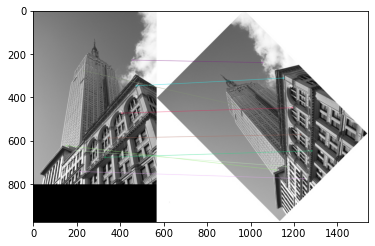

In [4]:
# Draw the best 10 matches.
nBestMatches = 10
matching_des_des_45 = cv.drawMatches(img_gray, kp, img_45_gray, kp_45,
matches_des_des_45[:nBestMatches],
None,
flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matching_des_des_45)
cv.imwrite('matching_des_des_45.png', matching_des_des_45)


In [5]:
kp_train = kp_45
kp_query = kp
for i in range (0, nBestMatches):
    print("match ", i, " info")
    print("\tdistance:", matches_des_des_45[i].distance)
    print("\tkeypoint in train: ID:", matches_des_des_45[i].trainIdx, " x:",
          kp_train[matches_des_des_45[i].trainIdx].pt[0], " y:",
          kp_train[matches_des_des_45[i].trainIdx].pt[1])
    print("\tkeypoint in query: ID:", matches_des_des_45[i].queryIdx, " x:", 
          kp_query[matches_des_des_45[i].queryIdx].pt[0], " y:",
          kp_query[matches_des_des_45[i].queryIdx].pt[1])

match  0  info
	distance: 9.380831718444824
	keypoint in train: ID: 2443  x: 677.6953125  y: 773.8290405273438
	keypoint in query: ID: 661  x: 215.93624877929688  y: 740.7075805664062
match  1  info
	distance: 9.69536018371582
	keypoint in train: ID: 2356  x: 663.0458984375  y: 571.4856567382812
	keypoint in query: ID: 1721  x: 348.70166015625  y: 587.2408447265625
match  2  info
	distance: 11.747340202331543
	keypoint in train: ID: 963  x: 487.35565185546875  y: 240.7156524658203
	keypoint in query: ID: 2328  x: 458.2903137207031  y: 229.1184844970703
match  3  info
	distance: 12.206555366516113
	keypoint in train: ID: 2080  x: 624.6529541015625  y: 447.94830322265625
	keypoint in query: ID: 2090  x: 408.8612060546875  y: 472.7430419921875
match  4  info
	distance: 12.961481094360352
	keypoint in train: ID: 1525  x: 549.5103759765625  y: 733.6979370117188
	keypoint in query: ID: 101  x: 153.57798767089844  y: 621.6637573242188
match  5  info
	distance: 13.0
	keypoint in train: ID: 175

True

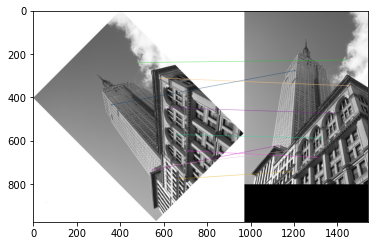

In [6]:
matches_des_45_des = bf.match(des_45, des)
matches_des_45_des = sorted(matches_des_45_des, key = lambda x:x.distance)
matching_des_45_des = cv.drawMatches(img_45_gray, kp_45, img_gray, kp,
matches_des_45_des[:nBestMatches],
None,
flags = cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(matching_des_45_des)
cv.imwrite('matching_des_45_des.png', matching_des_45_des)


#### Task 2

In [7]:
def CompareImages(nBestMatches, matches_vector1, matches_vector2):
    total_dist = np.nan
    for i in range (0, nBestMatches):
        total_dist = matches_vector1[i].distance + matches_vector2[i].distance
        total_dist = total_dist/2
    return total_dist
        

In [8]:
#Calculate the matches for comparing

matches_des_des_zoomedout = bf.match(des, des_zoomedout)
matches_des_des_zoomedout = sorted(matches_des_des_zoomedout, key = lambda x:x.distance)

matches_des_zoomedout_des = bf.match(des_zoomedout, des)
matches_des_zoomedout_des = sorted(matches_des_zoomedout_des, key = lambda x:x.distance)

####################
matches_des_des_another = bf.match(des, des_another)
matches_des_des_another = sorted(matches_des_des_another, key = lambda x:x.distance)

matches_des_another_des = bf.match(des_another, des)
matches_des_another_des = sorted(matches_des_another_des, key = lambda x:x.distance)

In [9]:
for nBestMatches in range(10,110,10):
    tDist = CompareImages(nBestMatches, matches_des_des_45, matches_des_45_des)
    print("Total dist for des and des 45:", tDist, "using nBestMatches:", nBestMatches)

print("___________________________________________________________________")

for nBestMatches in range(10,110,10):
    tDist = CompareImages(nBestMatches, matches_des_des_zoomedout, matches_des_zoomedout_des)
    print("Total dist for des and des zoomedout:", tDist, "using nBestMatches:", nBestMatches)

print("___________________________________________________________________")

for nBestMatches in range(10,110,10):
    tDist = CompareImages(nBestMatches, matches_des_des_another, matches_des_another_des)
    print("Total dist for des and des another:", tDist, "using nBestMatches:", nBestMatches)

Total dist for des and des 45: 14.899664878845215 using nBestMatches: 10
Total dist for des and des 45: 18.81488800048828 using nBestMatches: 20
Total dist for des and des 45: 19.899747848510742 using nBestMatches: 30
Total dist for des and des 45: 21.44761085510254 using nBestMatches: 40
Total dist for des and des 45: 22.44994354248047 using nBestMatches: 50
Total dist for des and des 45: 23.173259735107422 using nBestMatches: 60
Total dist for des and des 45: 23.979158401489258 using nBestMatches: 70
Total dist for des and des 45: 24.718414306640625 using nBestMatches: 80
Total dist for des and des 45: 25.079872131347656 using nBestMatches: 90
Total dist for des and des 45: 25.826343536376953 using nBestMatches: 100
___________________________________________________________________
Total dist for des and des zoomedout: 13.67479419708252 using nBestMatches: 10
Total dist for des and des zoomedout: 15.842979431152344 using nBestMatches: 20
Total dist for des and des zoomedout: 18.1934